Neuromorphic engineering I

## Lab 7: Winner-Take-All circuit

Team member 1:

Team member 2:

TLJH username:

Date:

-------------------------------------------------------------------------------------------------------------------

The winner-take-all (WTA) circuit models a neural network consisting
of $n$ excitatory cells and one inhibitory cell. When the excitatory
cells are active, they excite the inhibitory cell which in turn
inhibits all excitatory cells. The inhibitory cell's activity will
increase until it silences all excitatory cells but one.  If
the network loop gain is high enough, this excitatory cell is able to
maintain the required inhibitory cell activity by itself.
Naturally, the excitatory cell that survives is the one with the
largest extrinsic input.

A useful extension of the WTA network is the introduction of
positive feedback and lateral coupling through
both excitatory and (local) inhibitory nearest neighbor interactions. 
The positive feedback variant of the classical WTA 
network shows a hysteretic behavior
in the selection/de-selection mechanism, and is therefore denoted
the hysteretic winner-take-all (HWTA) network.


In this lab, we will investigate properties of both the classical WTA and
HWTA circuits.  Circuit schematics of a single cell
in the WTA and HWTA networks are
shown in Fig. 1. We will first characterize the
response properties of the classical WTA circuit and then compare the
effect of the various circuit additions to the HWTA circuit.
Furthermore we will investigate the effect of the coupling
diffusor circuits in the HWTA circuit. These diffusors implement
both lateral excitatory and inhibitory coupling between the cells.


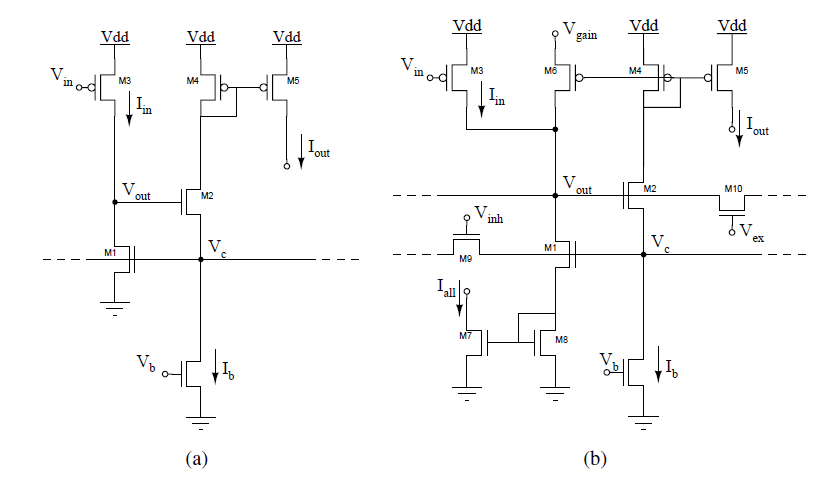
**Figure 1**: (a) Schematic of a single cell of a classical WTA network. (b) Schematic of a
single cell of a HWTA network.

# 1 Reading

Study the handouts and read the papers:

**Indiveri, 2001** A current-mode hysteretic winner-take-all
  network, with excitatory and inhibitory coupling

**Douglas, Martin 2007** Recurrent neuronal circuits in the neocortex
\end{description}


# 2 Prelab

This prelab will help you develop intuition for the input-output
current relationship of the network.
We suggest you read the entire Prelab to 
understand the chain of reasoning before attempting
to answer the questions. Assume subthreshold operation unless otherwise
stated.


1. To begin, let's consider the 2-node WTA network in Fig. 2. Note that the WTA bias current $I_b$ is
identical for both cells (they share the same bias voltage
$V_b$). Also note that node $V_c$ is common to both
cells. This common node is crucial, as it is through this node that
the global competition takes place. 



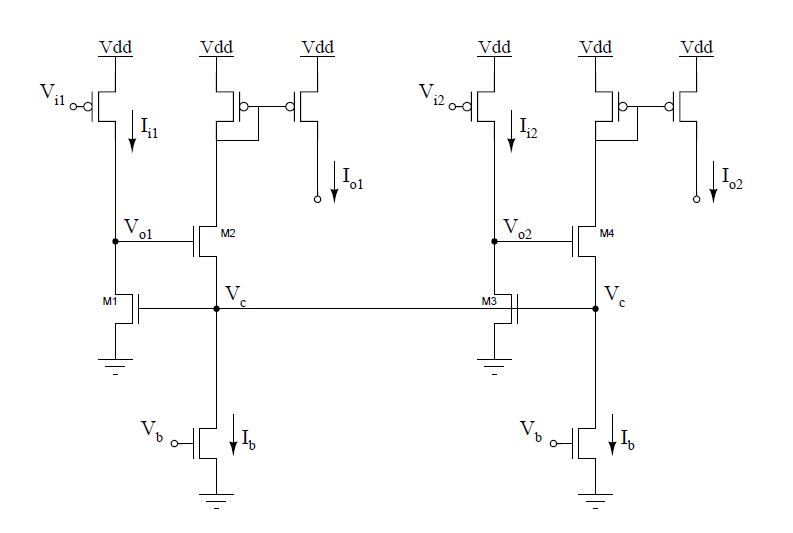
**Figure 2**: Schematic of a 2-node WTA network.

Write down the equations for the (subthreshold) currents flowing through transistors M1 and M3, as a function of their gate, source and drain voltages, separating their _forward_ and _reverse_ components.
Don't take into account, for the time being, the Early effect in the equations.

Given that the gate voltages of M1 and M3 are the same, what happens to $V_c$, $V_{o1}$ and $V_{o2}$ if (In each case, determine whether M2 and M4 are conducting,
and how $I_{o1}$ and $I_{o2}$ change as a function of the gate voltages
of M2 and M4.):
- $I_{i1}$ and $I_{i2}$ are identical.

- $I_{i1} \gg I_{i2}$

Generalize your results to an $n$-input WTA circuit.

2. The analysis above applies when the input currents are sufficiently different. To understand what happens when the inputs are very similar, we have to take into account the Early effect on devices M1 and M3. Let's do a small-signal analysis.

Initially, the input currents are equal, $I_{i1}=I_{i2}=I_u,$ and therefore the outputs are equal, $I_{o1}=I_{o1}=I_b.$ A small differential input $\Delta{I_{in}}$ is then applied, i.e. the
inputs are now $I_u\pm\frac{1}{2}\Delta{I_{in}}$. What is the differential output, $\Delta{V}_{out}$?  

Proceed as follows:
- To help you in your reasoning, draw a transistor's subthreshold $I_{ds}$ vs. $V_{ds}$ curve. 

- Assume that $V_c$ does not change. Given that the drain conductance of M1 and M3 is $g_{\rm d}$, figure out how much $V_{o1}$ and $V_{o2}$ must change to accomodate the change in current.

- Given these changes, use the small-signal transconductance $g_{\rm m}$ of M2 and M4 to figure out how much the output currents will change.

- Express the drain conductance and transconductance in terms of $I_u$ and $I_b$ and obtain a relationship between the normalized input and output signals, $\Delta{I_{in}}/I_u$ and $\Delta{I_{out}}/I_b$.

- Go back and justify the assumption that the $V_c$ does not change.

- How much is the gain for these normalized signals for typical parameter values?

- How does it change if the devices are operating above threshold?

3. The circuit on the CoACH chip has the circuit of Fig. 1 (b), which has four differences from Fig. 1 (a). In order to conduct the experiment, you need to answer the following questions:

* M6

What function does it implement?

What should $V_{gain}$ be in order to disable this function?

What should $V_{gain}$ be in order to enable this function, and what is the effect?

* M7 and M8

What function does it implement?

What other effect does it introduce? (Hint: Discuss the changes in $V_{c}$, $V_o$ and $I_o$ in two cases for a 2-WTA: $I_{i1} = I_{i2}$ and $I_{i1} \gg I_{i2}$)

* M9

What function does it implement?

What should $V_{ex}$ be in order to disable this function?

What should $V_{ex}$ be in order to enable this function, and what is the effect?

* M10

What function does it implement?

What should $V_{inh}$ be in order to disable this function?

What should $V_{inh}$ be in order to enable this function, and what is the effect?

# 3 Setup

## 3.1 Connect the device

In [ ]:
# import the necessary libraries
import pyplane
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [ ]:
# create a Plane object and open the communication
if 'p' not in locals():
    p = pyplane.Plane()
    try:
        p.open('/dev/ttyACMx')
    except RuntimeError as e:
        del p
        print(e)

In [ ]:
# Send a reset signal to the board, check if the LED blinks
p.reset()

In [ ]:
# Try to read something, make sure the chip responses
p.read_current(pyplane.ReadCurrentChannel.GO0)

In [ ]:
# If any of the above steps fail, delete the object, close and halt, stop the server and ask the TA to restart
# please also say your board number: ttyACMx

# del p

## 3.1 Chip configuration

To measure $I_{out}$, use:

```
p.send_coach_event(pyplane.Coach.generate_aerc_event(
    pyplane.pyplane.Coach.CurrentOutputSelect.SelectLine2,
    pyplane.Coach.VoltageOutputSelect.SelectLine0,
    pyplane.Coach.VoltageInputSelect.SelectLine0,
    pyplane.Coach.SynapseSelect.NoneSelected,0))
```

To measure $I_{all}$, use:

```
p.send_coach_event(pyplane.Coach.generate_aerc_event(
    pyplane.pyplane.Coach.CurrentOutputSelect.SelectLine3,
    pyplane.Coach.VoltageOutputSelect.SelectLine0,
    pyplane.Coach.VoltageInputSelect.SelectLine0,
    pyplane.Coach.SynapseSelemct.NoneSelected,0))
```

## 3.2 Bias Generator (BiasGen or BG)

In a simplified form, the output of a branch of the BiasGen will be the gate voltage $V_b$ for the bias current $I_b$, and if the current mirror has a ratio of $w$ and the bias transistor operates in subthreshold-saturation:
\begin{equation}
I_b = w\frac{BG_{fine}}{256}I_{BG_{master}}
\end{equation}
Where $I_{BG_{master}}$ is the `BiasGenMasterCurrent` $\in \left\{ 60~\rm{pA}, 460~\rm{pA}, 3.8~\rm{nA}, 30~\rm{nA}, 240~\rm{nA} \right\}$, $BG_{fine}$ is the integer fine value $\in [0, 256)$

To set a bias, use the function similar to the following:

```
p.send_coach_event(pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.BIAS_NAME, \
    pyplane.Coach.BiasType.BIAS_TYPE, \
    pyplane.Coach.BiasGenMasterCurrent.MASTER_CURRENT, FINE_VALUE))
```

**You may have noticed that there are some biases that are not used to directly generate a current, but rather what matters is the voltage, e.g. $V_{gain}$, $V_{ex}$ and $V_{inh}$ in our HWTA circuit. Even though they may have a `BIAS_NAME` ending with `_N` or `_P` it only indicates that they are connected to the gate of an N- or a P-FET, but the `BIAS_TYPE` parameter can be both `_N` or `_P`. For example, setting a `_N` bias to `BIAS_TYPE = P` will only make this voltage very close to GND, which _is_ sometimes the designed use case.**

## 3.3 Setup C2F and voltage output buffer

In [ ]:
# setup C2F
p.send_coach_event(pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.C2F_HYS_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I60pA, 100))

p.send_coach_event(pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.C2F_BIAS_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I240nA, 255))

p.send_coach_event(pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.C2F_PWLK_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I240nA, 255))

p.send_coach_event(pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.C2F_REF_L, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 255))

p.send_coach_event(pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.C2F_REF_H, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 255))

# setup output rail-to-rail buffer
p.send_coach_event(pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.RR_BIAS_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I240nA, 255))

# 3.4 Schematic and pin map

In this Lab you will work with the WTA circuits on the CoACH chip.

The winner-take-all circuit comprises 16 cells, with the first cell connected to the last cell by "wrap-around lines", VO & VC.
There are four circuit biases parameters, shared by all cells: $V_b$, $V_{ex}$, $V_{inh}$ and $V_{gain}$.

As this circuit is known to be sensitive to mismatch, dummies were used extensively: both within the cells to ensure cell devices are surrounded by same geometries, as well as by placing dummy cells on either side of the array to mitigate corner effects on Cell 1 and Cell 16. (No need to know the details)

Schematic of each cell of the WTA circuit is shown below (It should be WTA instead of WTC). Hysteresis is enabled (`VHEN_VSI = 0`) by default, but you can easily set $V_{gain}$ to disable it.

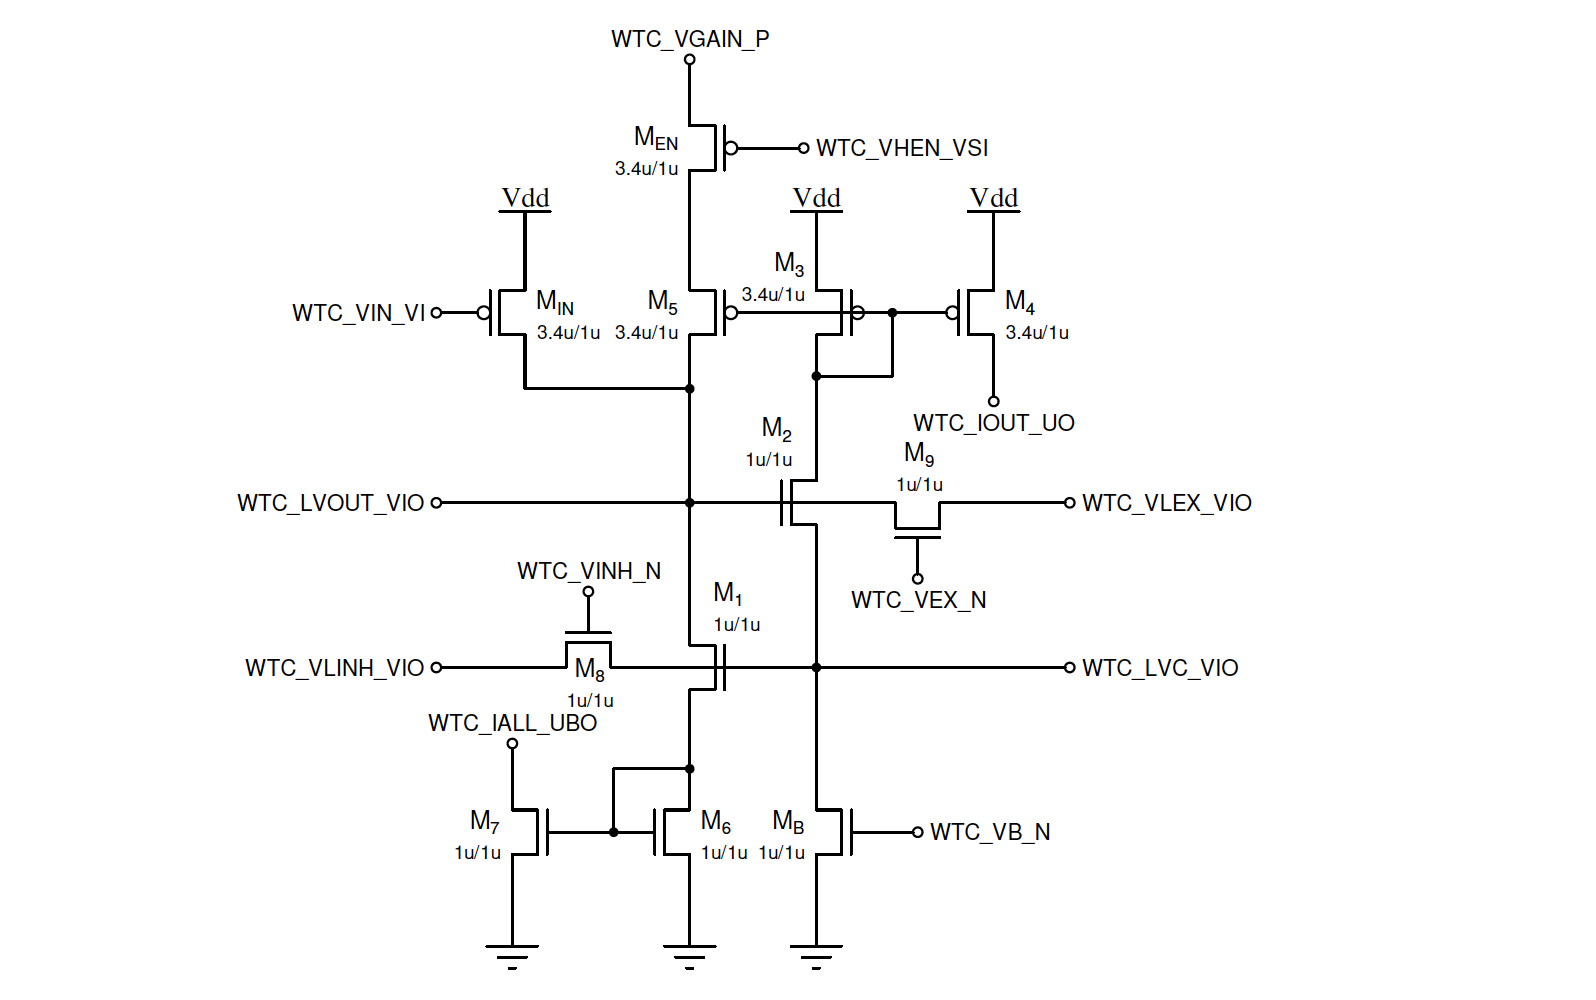

**For cell $x$ $\left(0 \le x < 16\right)$:**

* `WTC_VIN_VI[x]` = $V_{in,x}$ = AINx
* `WTC_LVOUT_VIO[x]` = $V_{out,x}$ = ADC[15-x]
* `WTC_IOUT_UO[x]` = $I_{out,x}$ = C2F[x]  (CurrentOutputSelect = SelectLine2)
* `WTC_IALL_UBO[x]` = $I_{all,x}$ = C2F[x]  (CurrentOutputSelect = SelectLine3)

# 4 Calibration

## 4.1 Calibration of C2F channels for $I_{out}$

In order to calibrate each C2F channel more accurately, we construct a case when only the calibrated cell wins, so that all 16 $I_b$ flow through the winning channel.

### 4.1.1 Chip configuration

In [ ]:
p.send_coach_event(pyplane.Coach.generate_aerc_event(
    pyplane.pyplane.Coach.CurrentOutputSelect.SelectLine2,
    pyplane.Coach.VoltageOutputSelect.SelectLine0,
    pyplane.Coach.VoltageInputSelect.SelectLine0,
    pyplane.Coach.SynapseSelect.NoneSelected,0))

### 4.1.2 Set fixed voltages

* What value should bias `WTA_VGAIN_P` take?

In [ ]:
p.send_coach_event(pyplane.Coach.generate_biasgen_event(pyplane.Coach.BiasAddress.WTA_VGAIN_P,...,...,...))

* What value should bias `WTA_VEX_N` take?

In [ ]:
p.send_coach_event(pyplane.Coach.generate_biasgen_event(pyplane.Coach.BiasAddress.WTA_VEX_N,...,...,...))

* What value should bias `WTA_VINH_N` take?

In [ ]:
p.send_coach_event(pyplane.Coach.generate_biasgen_event(pyplane.Coach.BiasAddress.WTA_VINH_N,...,...,...))

* What value should the $V_{in}$ of the non-winning cells take? 

In [ ]:
V_lose = ...
for i in range(16):
    p.set_voltage(eval('pyplane.VoltageChannel.AIN' + str(i)), V_lose)

* What value should the $V_{in}$ of the winning cell take? 

In [ ]:
V_win = ...

### 4.1.3 Data aquisition

* For each cell, sweep the total bias current ($16 I_b$ from 0 to 10 nA). Because we don't need too high precision, and it takes 16x the time, only 6 points (including 0) per channel is enough.

In [ ]:
p.set_sampling_mode(pyplane.SamplingMode.Slow)
p.set_sample_rate(10)
N_samples = 6
Ib = np.linspace(0, 10e-9, N_samples)
fine = np.round(Ib/16/460e-12/3*256).astype(int)
c2f = np.zeros([16, N_samples])
for i in range(16):
    VC_win = eval('pyplane.VoltageChannel.AIN' + str(i))
    p.set_voltage(VC_win, V_win)
    for j in range(N_samples):
        p.send_coach_event(pyplane.Coach.generate_biasgen_event(
            pyplane.Coach.BiasAddress.WTA_VB_N, pyplane.Coach.BiasType.N,
            pyplane.Coach.BiasGenMasterCurrent.I460pA, fine[j]))
        time.sleep(0.5)
        c2f[i][j] = p.read_sampled_c2f(i)
    p.set_voltage(VC_win, V_lose)
p.set_sampling_mode(pyplane.SamplingMode.Off)

* Plot data (Hint: `np.transpose`)

* Save data

* Fit data

## 4.2 Calibration of input current $I_{in}$ vs input voltage $V_{in}$

The input is given as voltage (`WTC_VIN_VI` = $V_{in}$), so we want to know the exact current $I_{in} (= I_{all})$ first.

### 4.2.1 Chip configuration

In [ ]:
p.send_coach_event(pyplane.Coach.generate_aerc_event(
    pyplane.pyplane.Coach.CurrentOutputSelect.SelectLine3,
    pyplane.Coach.VoltageOutputSelect.SelectLine0,
    pyplane.Coach.VoltageInputSelect.SelectLine0,
    pyplane.Coach.SynapseSelect.NoneSelected,0))

### 4.2.2 Set fixed voltages

* What value should bias `WTA_VGAIN_P` take?

In [ ]:
p.send_coach_event(pyplane.Coach.generate_biasgen_event(pyplane.Coach.BiasAddress.WTA_VGAIN_P,...,...,...))

* What value should bias `WTA_VEX_N` take?

In [ ]:
p.send_coach_event(pyplane.Coach.generate_biasgen_event(pyplane.Coach.BiasAddress.WTA_VEX_N,...,...,...))

* What value should bias `WTA_VINH_N` take?

In [ ]:
p.send_coach_event(pyplane.Coach.generate_biasgen_event(pyplane.Coach.BiasAddress.WTA_VINH_N,...,...,...))

* What value should bias `WTA_VB_N` take?

In [ ]:
p.send_coach_event(pyplane.Coach.generate_biasgen_event(pyplane.Coach.BiasAddress.WTA_VB_N,...,...,...))

### 4.2.3 Data aquisition

Assume that the c2f calibration in 4.1 is accurate， then if we sweep $V_{in}$ and measure the c2f response (which is connected to $I_{all}$ now, we can obtain the bijection between $V_{in}$ and $I_{in}$.

* What is the model of $I_{in}(V_{in})$ in subthreshold?

* Now sweep $V_{in}$ for all 16 channels at the same time to get the missing parameter in the model.

**Important:** Because all 16 channels are monitored by the c2f at the same time, if each channels has 50k events per second (this is the value everyone achieved in the last labs), it will result in almost 1M events per second in total, which is beyond the microcontroller's ability to handle and it will halt (and we have to repower it manually!). So in order to prevent this situation, **please never set any $V_{in}$ below 1.5V!**

In [ ]:
p.set_sampling_mode(pyplane.SamplingMode.Slow)
p.set_sample_rate(10)
N_samples = 25
Vi_set = np.linspace(1.8, 1.5, N_samples)
Vi = np.zeros(N_samples)
c2f = np.zeros([16, N_samples])
for j in range(N_samples):
    for i in range(16):
        p.set_voltage(eval('pyplane.VoltageChannel.AIN' + str(i)), Vi_set[j])
    Vi[j] = p.get_set_voltage(pyplane.VoltageChannel.AIN0)
    time.sleep(0.5)
    c2f[::-1,j] = p.read_all_sampled_c2fs()
p.set_sampling_mode(pyplane.SamplingMode.Off)

* Plot data (Hint: `np.transpose`)

* Save data

* Fit data

## 4.3 Calibration of the individual bias currents (optional)

If we repeat 4.1 but with $V_c$ between cells isolated (Hint: by setting $V_{inh}$ to proper value), we could measure individual $I_b$.

# 5 Basic WTA behavior

In this experiment, we will observe the winner–take–all network in action. We will only use cell 0 and 1 and disable all other cells.

## 5.1 Set fixed voltages

* What value should bias `WTA_VGAIN_P` take?

In [ ]:
p.send_coach_event(pyplane.Coach.generate_biasgen_event(pyplane.Coach.BiasAddress.WTA_VGAIN_P,...,...,...))

* What value should bias `WTA_VEX_N` take?

In [ ]:
p.send_coach_event(pyplane.Coach.generate_biasgen_event(pyplane.Coach.BiasAddress.WTA_VEX_N,...,...,...))

* What value should bias `WTA_VINH_N` take?

In [ ]:
p.send_coach_event(pyplane.Coach.generate_biasgen_event(pyplane.Coach.BiasAddress.WTA_VINH_N,...,...,...))

* What value should bias `WTA_VB_N` take?

In [ ]:
p.send_coach_event(pyplane.Coach.generate_biasgen_event(pyplane.Coach.BiasAddress.WTA_VB_N,...,...,...))

* What value should the $V_{in}$ of Cell 2 - Cell15 take in order to disable them? 

In [ ]:
for i in range(2, 16):
    p.set_voltage(eval('pyplane.VoltageChannel.AIN' + str(i)), ...)

## 5.2 Data aquisition

* Fix $V_{in,1}$ to a value and sweep $V_{in,0}$ from above $V_{in,1}$ to below $V_{in,1}$ then to above $V_{in,1}$ again and observe the two $V_{out}$, $I_{out}$ and $I_{all}$.

**Important: never set any $V_{in}$ below 1.5 V**

* Plot data

* Save data

## 5.3 Different bias currents

Repeat 5.2 with two differnt bias currents.

# 6 Hysteretic WTA behavior

In this experiment, we will observe the winner–take–all network with hysteresis. This implies a "memory" effect.

We will still use only cell 0 and 1 and disable all other cells.

## 6.1 Set fixed voltages

* What value should bias `WTA_VEX_N` take?

In [ ]:
p.send_coach_event(pyplane.Coach.generate_biasgen_event(pyplane.Coach.BiasAddress.WTA_VEX_N,...,...,...))

* What value should bias `WTA_VINH_N` take?

In [ ]:
p.send_coach_event(pyplane.Coach.generate_biasgen_event(pyplane.Coach.BiasAddress.WTA_VINH_N,...,...,...))

* What value should bias `WTA_VB_N` take?

In [ ]:
p.send_coach_event(pyplane.Coach.generate_biasgen_event(pyplane.Coach.BiasAddress.WTA_VB_N,...,...,...))

* What value should the $V_{in}$ of Cell 2 - Cell15 take in order to disable them? 

In [ ]:
for i in range(2, 16):
    p.set_voltage(eval('pyplane.VoltageChannel.AIN' + str(i)), ...)

## 6.2 Data aquisition

* What value should bias `WTA_VGAIN_P` take?

In [ ]:
p.send_coach_event(pyplane.Coach.generate_biasgen_event(pyplane.Coach.BiasAddress.WTA_VGAIN_P,...,...,...))

* Fix $V_{in,1}$ to a value and sweep $V_{in,0}$ from above $V_{in,1}$ to below $V_{in,1}$ then to above $V_{in,1}$ again and observe the two $V_{out}$, $I_{out}$ and $I_{all}$.

**Important: never set any $V_{in}$ below 1.5 V**

* Plot data

* Save data

## 6.3 Different gain voltages

Repeat 6.2 with two differnt $V_{gain}$.

# 7 Multi-cell WTA (Optional)

In this experiment, we will use all 16 cells of the WTA circuit and see how it responds to a "bump" in the input.

## 7.1 No lateral interaction

Set a "bump" in $V_{in}$ and measure $V_{out}$, $I_{out}$ and $I_{all}$.

## 7.2 With lateral excitation

Repeat 7.1 but with $V_{ex}$ set to a proper value to enable lateral excitation.

## 7.3 With lateral inhibition

Repeat 7.1 but with $V_{inh}$ set to a proper value to enable lateral inhibition. (Hint: it may only be possible to turn it fully on/off, why?)

# 8 Postlab

* What are the advantages and disadvantages of doing computation in current domain vs voltage domain?

* What kind of computation does the WTA circuit do?

* If you were the person to design this circuit for students for the next generation of classchip, what would you like change in order to make it easier to use/have larger dynamic range/less sensitive to mismatch?